## Web Scrapping using BeautifulSoup - US Inflation Rate 

Data Source: [Bureau of Labor Stastitics](https://data.bls.gov/pdq/SurveyOutputServlet) <br><br>

We are scrapping tabular data for US Inflation Rate from the website [Bureau of Labor Stastitics](https://data.bls.gov/pdq/SurveyOutputServlet). We will dicuss implementation of webscrapping using python framework called BeautifulSoup. It is a thrid party library for pulling data HTML and XML files.
<br>
Steps involved in webscrapping:

1. Send an HTTP request to the URL of the webpage. The sever of the website responds to the request by returning HTML contents of the webpage. For this we will use third party library for python-requests. 

2. Now that we have the HTML contents, we need to parse the data. We can not parse the data simply through string processing. BeautifulSoup library is that it is built on the top of the HTML parsing libraries like html5lib, lxml, html.parser, etc (multiple parsing methods available to parse the data).  

3. We need to navigate and search the parsed tree using Beautiful Soup. 
<br><br>

**Step 1: Install required third-party libraries**
``` python
pip install requests          # for connecting to server
pip install  html5lib         # parser method
pip install bs4               # Librabry for Beautiful Soup

``` 

**Step 2: Accessing HTML content from the webpage**

In [1]:
#importing pacakages
from bs4 import BeautifulSoup
import requests
import html5lib

#load the website link in requests.get() and chain .text to get the html content printed nicely
html_text = requests.get("https://data.bls.gov/pdq/SurveyOutputServlet").text

#print(html_text)                                

There are various parser methods available but we have taken 'html5lib' in our example

In [2]:
soup = BeautifulSoup(html_text, 'html5lib')         #lxml is the parser method passed in string format
#print(soup)

To access the elements from html content, we will inspect the website. <br>
1. Right click on table header and select inspect > html content will be displayed on right side of the screen <br>
The content we want is stored in 'table' tag having class as 'regular-data'. <br> We will use .find() function to find the tag 'table' having class 'regular-data' using BeautifulSoup instance created in above cell.

In [5]:
tables = soup.find_all('table')
for table in tables:
    print("Different classes in tag table are:",table.get('class'))
    print("")

In [6]:
class_div = soup.find('div',class_ = 'verdana md')
print(class_div)

<div class="verdana md" id="bodytext">
		

	<!-- 1COL LAYOUT COL1 END -->

	<!--no_index_end-->
	<!-- MAIN CONTENT BEGIN -->
	<h1 class="warning">
		<img align="left" border="0" height="35" src="/images/icon_warn.gif" width="35"/>   Notice
	</h1>

	<p>Wednesday, April 19, 2023 4:17:42 PM EDT</p>

	
	<p>The database is currently unavailable.</p>
	
	<div class="dbdown_message">Your request was invalid for this Data Access Service. Please attempt other data requests. Thank you for using LABSTAT.</div>
	
	<!-- MAIN CONTENT END -->

	<!--no_index_start-->
	<!-- 2COL LAYOUT COL2 BEGIN -->
			<!--#include virtual="/include/global/social_media.stm"-->
		</div>


### Note:
Look at the html content above. The response we got: <br><br>"*The database is currently unavailable.Your request was invalid for this Data Access Service. Please attempt other data requests.*" <br>

This means at this point of time, the site has restricted access of the data. Upon searching on web, there's another website which provides same information.<br><br>
Now the source changes to: [US Inflation Calculator](https://www.usinflationcalculator.com/inflation/historical-inflation-rates/)
<br> Rewriting **step two**

In [7]:
#importing pacakages
from bs4 import BeautifulSoup
import requests
import html5lib

#load the website link in requests.get() and chain .text to get the html content printed nicely
html_text = requests.get("https://www.usinflationcalculator.com/inflation/historical-inflation-rates/").text

#print(html_text)

In [8]:
soup = BeautifulSoup(html_text,'html5lib')
#print(soup)

The data we want is present in tag 'table' with no specific class. Let's see if the html content hve multiple tags as 'table'. If not, we can directly speciify tag 'table' in BeautifulSoup instance.

In [11]:
tables = soup.find_all('table')
for table in tables:
    print("Different classes in tag table are:",table.get('class'))
    print("")

Different classes in tag table are: None



Seems likes there's only one table with no specific class. Let's pass it to BeautifulSoup object. 

In [12]:
table = soup.find('table')
#print(table)

All the rows for the table are stored inside tag 'tr'. Here, we need to loop through each row. So far, we are in tag 'table' > tag 'tr'

In [13]:
rows = table.find_all('tr')
#print(rows)

Inside the tag 'tr', values for year column are stored in tag 'th' and values for other column values are stored in tag 'td' <br><br>
Approach:
1. Create two different lists to store year values and other column values
2. Create two dataframe 
3. Concat year and other column dataframe into final dataframe

In [15]:
#navigating to column values for year column
for row in rows:
    year_values = row.find_all('th')      #year values are present in tag 'th'
    print(year_values)

[<th scope="row" valign="top">Year</th>, <th scope="col" valign="top">Jan</th>, <th scope="col" valign="top">Feb</th>, <th scope="col" valign="top">Mar</th>, <th scope="col" valign="top">Apr</th>, <th scope="col" valign="top">May</th>, <th scope="col" valign="top">Jun</th>, <th scope="col" valign="top">Jul</th>, <th scope="col" valign="top">Aug</th>, <th scope="col" valign="top">Sep</th>, <th scope="col" valign="top">Oct</th>, <th scope="col" valign="top">Nov</th>, <th scope="col" valign="top">Dec</th>, <th scope="col" valign="top">Ave</th>]
[<th scope="row">1914</th>]
[<th scope="row">1915</th>]
[<th scope="row">1916</th>]
[<th scope="row">1917</th>]
[<th scope="row">1918</th>]
[<th scope="row">1919</th>]
[<th scope="row">1920</th>]
[<th scope="row">1921</th>]
[<th scope="row">1922</th>]
[<th scope="row">1923</th>]
[<th scope="row">1924</th>]
[<th scope="row">1925</th>]
[<th scope="row">1926</th>]
[<th scope="row">1927</th>]
[<th scope="row">1928</th>]
[<th scope="row">1929</th>]
[<th

In [16]:
#navigating to column values
for row in rows:
    column_values = row.find_all('td')      #all the column values are present in tag 'td'
    print(column_values)

[]
[<td align="center">2.0</td>, <td align="center">1.0</td>, <td align="center">1.0</td>, <td align="center">0.0</td>, <td align="center">2.1</td>, <td align="center">1.0</td>, <td align="center">1.0</td>, <td align="center">3.0</td>, <td align="center">2.0</td>, <td align="center">1.0</td>, <td align="center">1.0</td>, <td align="center">1.0</td>, <td align="center">1.0</td>]
[<td align="center">1.0</td>, <td align="center">1.0</td>, <td align="center">0.0</td>, <td align="center">2.0</td>, <td align="center">2.0</td>, <td align="center">2.0</td>, <td align="center">1.0</td>, <td align="center">-1.0</td>, <td align="center">-1.0</td>, <td align="center">1.0</td>, <td align="center">1.0</td>, <td align="center">2.0</td>, <td align="center">1.0</td>]
[<td align="center">3.0</td>, <td align="center">4.0</td>, <td align="center">6.1</td>, <td align="center">6.0</td>, <td align="center">5.9</td>, <td align="center">6.9</td>, <td align="center">6.9</td>, <td align="center">7.9</td>, <td al

Notice, empty list at the very beginning of the output. Let's skip it using IF statement and scrap the column values

In [25]:
#importing pacakages
from bs4 import BeautifulSoup
import requests
import html5lib

#load the website link in requests.get() and chain .text to get the html content printed nicely
html_text = requests.get("https://www.usinflationcalculator.com/inflation/historical-inflation-rates/").text

soup = BeautifulSoup(html_text,'html5lib')         #BeautifulSoup object with html5lib parser
table = soup.find('table')                         #tabluar data in html content

year_column = []                                   #catching the year values
values_list = []                                   #catching the column values

rows = table.find_all('tr')                        #all the rows in table
for row in rows:
    column_values = row.find_all('td')             #data for each column except year column
    if column_values != []: 
        values = {}                                #dictionary for values
        
        values['Jan'] = column_values[0].text
        values['Feb'] = column_values[1].text
        values['Mar'] = column_values[2].text
        values['Apr'] = column_values[3].text
        values['May'] = column_values[4].text
        values['Jun'] = column_values[5].text
        values['Jul'] = column_values[6].text
        values['Aug'] = column_values[7].text
        values['Sep'] = column_values[8].text
        values['Oct'] = column_values[9].text
        values['Nov'] = column_values[10].text
        values['Dec'] = column_values[11].text
        values['Average'] = column_values[12].text
        #print(values)
    values_list.append(values)
    
    year = {}                                         #dictionary for year values
    year_values = row.find_all('th')                  #data for year column
    year['Year'] = year_values[0].text
    #print(year)
    year_column.append(year)                          #add the dict year to year_column

Let's create two different dataframes from year column and other columns and later combine both of them into one final dataframe.

In [29]:
import pandas as pd                                    #import pandas
values = pd.DataFrame(values_list)                     #other columns to dataframe
years = pd.DataFrame(year_column)                      #year column to dataframe
years = years[1:]                                      # little bit cleaning for year column

df = pd.concat([years,values], axis = 1)               #concat the two dataframes
df = df[:-1]

import numpy as np
df['Apr'].iloc[-1] = np.NaN

#saving file to csv
df.to_csv("US Inflation 1914-2023.csv", index = False)

**Now that we have succesfully scrape data from the website, we can explore the data and answer research questions :) <br><br>
Let's see what all information we can derive from this particular data set**

In [30]:
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Average
1,1914,2.0,1.0,1.0,0.0,2.1,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0
2,1915,1.0,1.0,0.0,2.0,2.0,2.0,1.0,-1.0,-1.0,1.0,1.0,2.0,1.0
3,1916,3.0,4.0,6.1,6.0,5.9,6.9,6.9,7.9,9.9,10.8,11.7,12.6,7.9
4,1917,12.5,15.4,14.3,18.9,19.6,20.4,18.5,19.3,19.8,19.5,17.4,18.1,17.4
5,1918,19.7,17.5,16.7,12.7,13.3,13.1,18.0,18.5,18.0,18.5,20.7,20.4,18.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, 1 to 110
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     110 non-null    object
 1   Jan      110 non-null    object
 2   Feb      110 non-null    object
 3   Mar      110 non-null    object
 4   Apr      109 non-null    object
 5   May      110 non-null    object
 6   Jun      110 non-null    object
 7   Jul      110 non-null    object
 8   Aug      110 non-null    object
 9   Sep      110 non-null    object
 10  Oct      110 non-null    object
 11  Nov      110 non-null    object
 12  Dec      110 non-null    object
 13  Average  110 non-null    object
dtypes: object(14)
memory usage: 12.9+ KB


Checking if null values are present

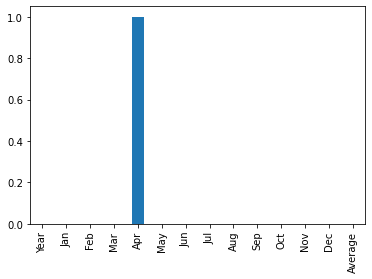

In [32]:
import matplotlib.pyplot as plt
df.isnull().sum().plot(kind = 'bar')
plt.show()

We are getting empty value in April because for Year 2023 the original value on website was "Available in May" so we replaced it with NaN